# Personal task

done by Malyshev Kyrylo

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


What can be better then classic Titanic dataset?

Right answer - **nothing!**

### 1. Merge data

In [2]:
df = pd.read_csv('titanic/train.csv')
df = df.set_index('PassengerId')
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 2. Some statistic of people on Titanic

In [3]:
data = df.copy()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 2, 'Q': 0})
data['Embarked'] = data['Embarked'].map({'S': 1, 'C': 2, 'Q': 0})

data.corr().style.background_gradient()


C:\Users\kiril\AppData\Local\Temp\ipykernel_4264\2728084223.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.126753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.307324
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.023175
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.042340
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.031095
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.035756
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.269588
Embarked,0.126753,-0.307324,0.023175,0.042340,-0.031095,0.035756,0.269588,1.000000


#### 3.1 Sex ratio (male/female)

In [4]:
sum(df['Sex'] == 'male') / sum(df['Sex'] == 'female')


1.8375796178343948

<AxesSubplot: ylabel='Sex'>

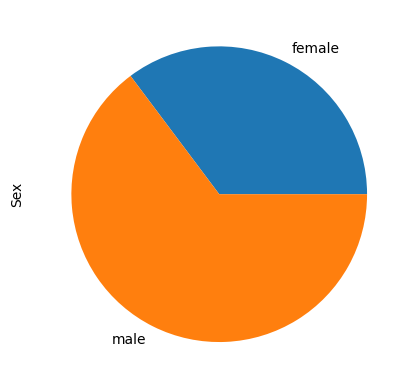

In [5]:
df.groupby('Sex')['Sex'].agg(len).plot(kind='pie')


### 4. Survive stats
#### 4.1 Survive stats by Age and Sex

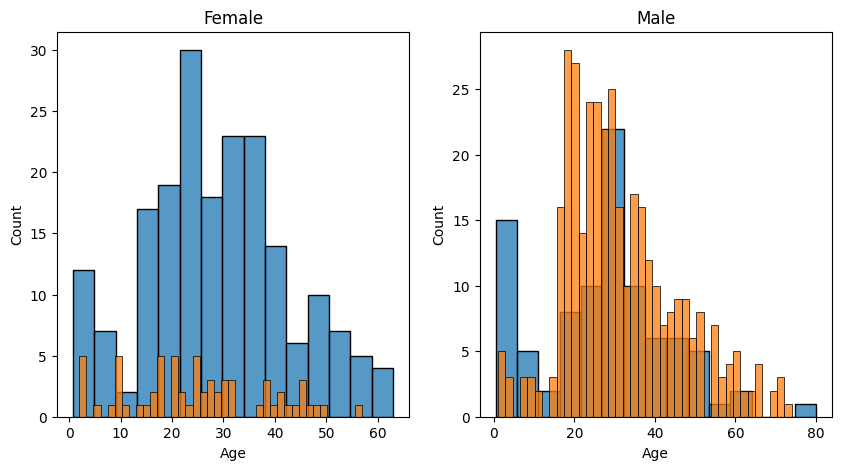

In [6]:
women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(women[women['Survived'] == 1].Age.dropna(),
             bins=15, label='survived', ax=ax1)
sns.histplot(women[women['Survived'] == 0].Age.dropna(),
             bins=40, label='not survived', ax=ax1)
ax1.set_title('Female')
sns.histplot(men[men['Survived'] == 1].Age.dropna(),
             bins=15, label='survived', ax=ax2)
sns.histplot(men[men['Survived'] == 0].Age.dropna(),
             bins=40, label='not survived', ax=ax2)
_ = ax2.set_title('Male')



The chart shows survivors and non-survivors by age and sex. Men have a better chance of surviving between the ages of 18 and 30, which is true to some extent for women as well, but not completely. Women have a higher chance of surviving between the ages of 14 and 40.

Men have an extremely low chance of surviving between the ages of 5 and 18, and women do not. Another thing to consider is that newborns have a slightly higher chance of surviving.

Because some ages have a higher chance of survival, and because I want all characteristics to be roughly on the same scale, I will develop age groups later.

#### 4.1 Survive stats by Pclass

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

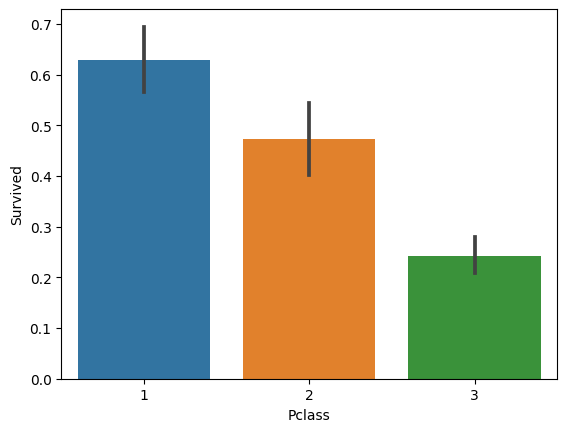

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df)


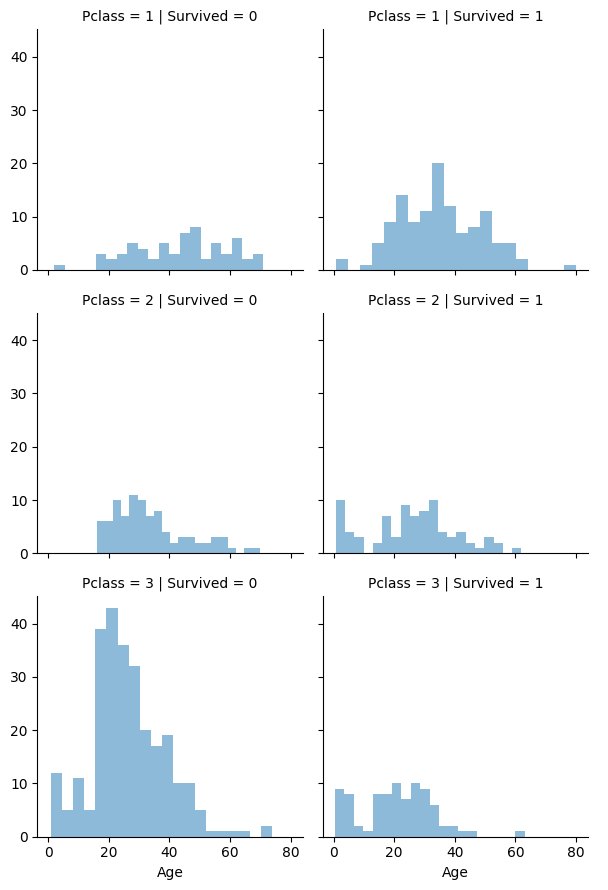

In [8]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
_ = grid.add_legend()


Pclass definitely contributes to a person's probability of survival, especially if that person is a class 1. The graph below confirms our theory about pclass 1, but it also shows that a person from pclass 3 has a high risk of death.

#### 4.2 SibSp and Parch

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [9]:
df['relatives'] = df['SibSp'] + df['Parch']
df.loc[df['relatives'] > 0, 'not_alone'] = 0
df.loc[df['relatives'] == 0, 'not_alone'] = 1
df['not_alone'] = df['not_alone'].astype(int)
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

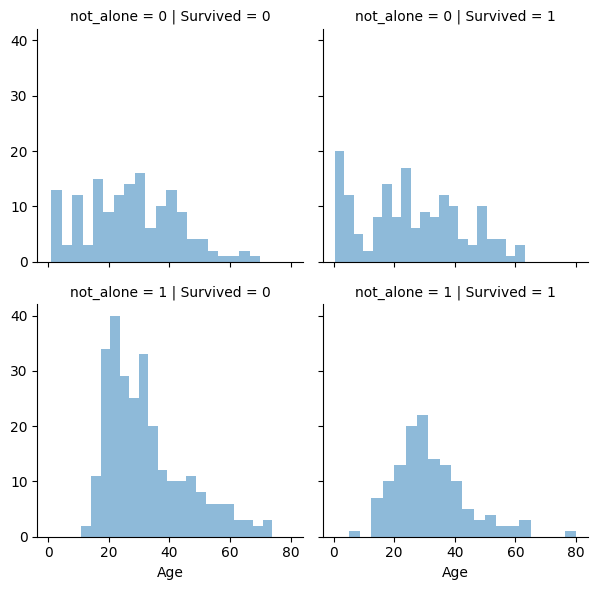

In [10]:
grid = sns.FacetGrid(df, col='Survived', row='not_alone')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
_ = grid.add_legend()
